<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 3.A - Programación Dinámica </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
A la hora de crear las matrices de programación dinámica podéis emplear diversas estructuras de datos. A la hora de gestionar matrices, la lista de listas puede ser una buena opción, pero existen librerías como NumPy que hacen una mejor gestión de las matrices.

Podéis consultar aquí la documentación: https://docs.scipy.org/doc/numpy/reference/

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- El problema de la mochila</p></h2>
  
  <p> En esta primera sección trabajaremos con el problema de la mochila que ya vimos en los problemas de Greedy. Refrequemos un poco:
</p>
  <center><img src="img/knapsack.png" width=30%></center>
  
  <p>
    Nos encontramos en una habitación en la que hay $N$ objetos, cada cual con un peso $w_1, w_2, w_3 ... w_N$ y un valor $v_1, v_2, v_3 ... v_N$. Disponemos de una mochila que puede soportar una carga máxima de $W$.
    Se busca conseguir llenar la mochila maximizando el valor total de la misma. Es decir queremos encontrar la combinación de objetos $b$ tal que $\arg_{b} \max{\sum_{i=0}^{N}{v_i · b_i}}$ manteniendo siempre cierto que no superamos el peso máximo de la mochila: $\sum_{i=0}^{N}{(w_i · b_i)}\leq W$.
     
</p>
  
Trabajaremos tres variantes de este problema. En el primero, dispondremos solo de un objeto de cada tipo; en otro dispondremos de una cantidad ilimitada de objetos de cada tipo; finalmente, dispondremos de una cantidad limitada $c_1, c_2, c_3 ... c_N$ de cada objeto.


In [5]:
try:
    xrange
except:
    xrange = range

''' 
Implementa aquí la solución de PD que resuelve el problema de la mochila simple (sin cantidades)
@input: Lista de listas con la forma [peso,valor] representando los objetos que podemos escoger.
@output: Lista de listas con la forma [peso,valor] representando los objetos escogidos.
'''
def dynamic_knapsack(W, D):
    n = len(D)
    K = [[0 for x in range(W+1)] for x in range(n+1)]
    
    for i in range(n+1):
        for w in range(W+1):
            if i==0 or w==0:
                K[i][w] = 0
            elif D[i-1][0] <= w:
                K[i][w] = max(D[i-1][1]+K[i-1][w-D[i-1][0]], K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
    
    result = []
    for i in range(n, 0, -1):
        v = K[i][w] != K[i-1][w]
 
        if v:
            result.append(D[i-1])
    
    return (K[n][W],result)

''' 
Implementa aquí la solución de PD que resuelve el problema de la mochila con cantidad de objetos limitados
@input: Lista de listas con la forma [peso,valor,cantidad] representando los objetos que podemos escoger.
@output: Lista de listas con la forma [peso,valor,cantidad] representando los objetos escogidos.
'''
def dynamic_knapsac_quantities(W, D):
    n = len(D)
    K = [[0 for w in range(W+1)] for j in xrange(n+1)]
    
    for i in range(n+1):
        for w in range(W+1):
            if i==0 or w==0:
                K[i][w] = 0
            else:
                K[i][w] = K[i-1][w]
                quantity = min(D[i-1][2], w//D[i-1][0])
                for j in range(1, quantity+1):
                    K[i][w] = max(j*D[i-1][1]+K[i-1][w-j*D[i-1][0]], K[i-1][w])
    
    result = []
    w = W
    for i in range(n, 0, -1):
        v = K[i][w]
        k = 0
        while v != K[i-1][w] + k*D[i-1][1]:
            k += 1
            w -= D[i-1][0]
 
        if k>0:
            result.append([D[i-1][0],D[i-1][1],k])
 
    return (K[n][W],result)

''' 
Implementa aquí la solución de PD que resuelve el problema de la mochila con cantidad de objetos ilimitados
@input: Lista de listas con la forma [peso,valor] representando los objetos que podemos escoger.
@output: Lista de listas con la forma [peso,valor,cantidad] representando los objetos escogidos.
'''
def dynamic_kapsac_infinite(W,D):
    n = len(D)
    K = [[0 for w in range(W+1)] for j in xrange(n+1)]
    
    for i in range(n+1):
        for w in range(W+1):
            if i==0 or w==0:
                K[i][w] = 0
            else:
                K[i][w] = K[i-1][w]
                j=1
                while j*D[i-1][0] <= w:
                    K[i][w] = max(j*D[i-1][1]+K[i-1][w-j*D[i-1][0]], K[i-1][w])
                    j+=1
    
    result = []
    w = W
    for i in range(n, 0, -1):
        v = K[i][w]
        k = 0
        while v != K[i-1][w] + k*D[i-1][1]:
            k += 1
            w -= D[i-1][0]
 
        if k>0:
            result.append([D[i-1][0],D[i-1][1],k])
 
    return (K[n][W],result)

In [6]:
from utils import random_objects
import random as rd
# random_objects genera una lista de objetos, 
# cada uno representado como [peso,valor] o [peso,valor,cantidad].
# Su único parámetro es un booleano opcional que indica si la 
# cantidad de objetos es finita (False) o infinita (True, por defecto)

# Prueba tus algoritmos aquí.
D = random_objects(False)
C = D.copy()
print(D)

W= rd.randint(50,150)
print(W)

print(dynamic_knapsack(W, D))
print(dynamic_knapsac_quantities(W, C))
print(dynamic_kapsac_infinite(W,D))

[[20, 78, 12], [48, 51, 9], [27, 45, 2], [18, 13, 10], [34, 65, 6], [35, 18, 1], [1, 10, 11], [49, 97, 4], [11, 7, 3], [36, 94, 7]]
125
(292, [[36, 94, 7], [49, 97, 4], [1, 10, 11], [34, 65, 6], [18, 13, 10], [27, 45, 2], [48, 51, 9], [20, 78, 12]])
(500, [[1, 10, 11], [20, 78, 5]])
(1250, [[1, 10, 125]])


<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Cuestiones</h3></p> </center> </div>

<ul>
    <li>¿En qué casos se encuentra solución óptima al problema?</li>
    <li>Explica las soluciones planteadas y analiza su complejidad. Comparalo con las implementaciones greedy.</li>
</ul>

__Escribe aquí tus respuestas__

<h4> Pregunta 1 </h4>

En los tres. En cada uno de ellos se encuentra la solucion optima a su respectivo problema.

<h4> Pregunta 2 </h4>

El primero es el algoritmo visto en clase de teoria.

En el segungo quando se mete un objeto en la mochila se mete el maximo numero disponible possible de este en funcion de cuantos de ellos disponemos i cuantos caben por peso.

I en el ultimo hacemos igual que el segundo pero solo mirado la restriccion del peso.

Al final de cad algoritmo hacemos un backtrack para dar la lista que da la solucion optima.

La complegidad de el primero es $O(nW)$.

Al segundo i al tercer como dentro del bucle se añade otro bucle que pude ir desde 1 hasta W en el peor de los casos tenemos que tienen una complejidad de $O(nW^2)$.

A diferencia de con los algoritmos de greedy con estos aseguramos encontrar la solucion pero sin embargo lo pagamos con un coste computacional mucho más elevado.

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2 - Algoritmo Floyd-Warshall</p></h2>
  
  <p> El algoritmo Floyd-Warshall es un algoritmo de programación dinámica que se emplea para encontrar los caminos mínimos en un grafo con pesos (que no tenga ciclos negativos) entre todos los pares de nodos. Se basa en ir construyendo una matriz con caminos intermedios entre trios de nodos. Podéis ver más información y consultar el pseudocódigo <a href="https://es.wikipedia.org/wiki/Algoritmo_de_Floyd-Warshall">aquí</a>.</p>


In [51]:
''' 
Implementa aquí el algoritmo Floyd Warshall

Damos la opcion de que el grafo sea dirigido, por defecto es no dirigido
'''
def floyd_warshall(G, undirected=True):
    V = len(A)
    dist = [[2**32-1 for x in range(V)] for x in range(V)] #matrix de distacias entre nodos, inicializada en infinito
    son = [[None for x in range(V)] for x in range(V)] #matriz con el sucesor de cada nodo inicializada a null
    
    #ponemos los pesos de los veritizes i el sucesor de esots
    for edge in G.edges(data=True):
        dist[edge[0]][edge[1]] = edge[2]['weight']
        son[edge[0]][edge[1]] = edge[1]
        if undirected: #solo se hace si el grafo es no dirigido
            son[edge[1]][edge[0]] = edge[0]
    
    #assumimos que no hay un coste para ir de un nodo a si mismo 
    #y si lo hubiera no lo usariamos asi que ponemos su peso en 0
    #y su sucesor a el misomo
    for v in G.nodes():
        dist[v][v] = 0
        son[v][v] = v
    
    for k in range(V):
        for i in range(V):
            for j in range(V):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    son[i][j] = son[i][k]
    
    return son
'''
Es una funcion que dados dos nodos i el resultado del algoritmo
floyd_warshall devuleve el camino minimo entre estos dos
'''
def min_path(s,t,son):
    if son[s][t]==None:
        return []
    
    path = [s]
    while s!=t:
        s = son[s][t]
        path.append(s)
    
    return path

[0, 2, 6]

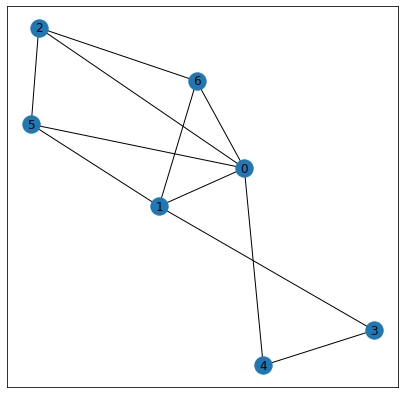

In [68]:
from utils import random_graph, draw_graph, draw_path
# random_graph(N,E) genera un grafo aleatorio con N vértices y E aristas.
#                   Podéis asumir que los ids de los nodos serán enteros del 0 a N-1
# draw_graph(G,s) dibuja el grafo G, el parámetro opcional s indica el tamaño del dibujo.
# draw_path(G,p,s) igual que draw_graph pero destacando las aristas que forman el path.

# Prueba aquí tu algoritmo.
A = random_graph(7,11)
draw_graph(A)

S = floyd_warshall(A)
min_path(0,6,S)

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Cuestiones</h3></p> </center> </div>

<ul>
    <li>Analiza la complejidad del algoritmo.</li>
</ul>

Hacemos tres bucles sobre |V| elementos con operaciones de coste constante dentro, por lo tanto la complegidad del algoritmo es $O(n)+O(n)+O(n^3)=O(n^3)$.